# CNN ( Convolutional Neural Network )

In [2]:
import tensorflow as tf
from tensorflow.keras import layers , models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [42]:
(X_train , y_train),(X_test,y_test) = mnist.load_data()

In [46]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [44]:
# Reshape to fit the dataset into CNN (batch,height,weight,channels)
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')/255

In [45]:
# One-Hot encode Labels
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [47]:
# Define CNN Models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [48]:
# Compile The Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8693 - loss: 0.4278 - val_accuracy: 0.9810 - val_loss: 0.0689
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9831 - loss: 0.0557 - val_accuracy: 0.9872 - val_loss: 0.0434
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9875 - loss: 0.0385 - val_accuracy: 0.9892 - val_loss: 0.0344
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9880 - val_loss: 0.0386
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.9908 - val_loss: 0.0309


In [50]:
test_loss , test_acc = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0329


In [51]:
test_loss , test_acc

(0.026497364044189453, 0.9905999898910522)

In [52]:
predict = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


In [53]:
import matplotlib.pyplot as plt

In [60]:
import numpy as np
np.argmax(predict[15])

5

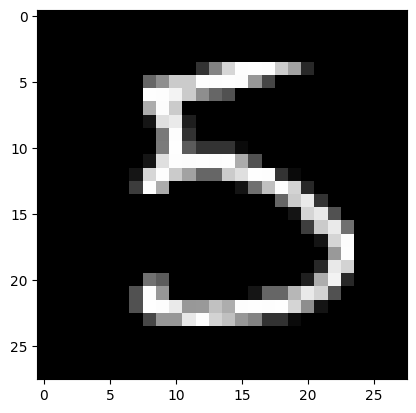

In [61]:
plt.imshow(X_test[15],cmap='gray')
plt.show()